#### TODO's
 * Import data &#10004;
 * Learn Question / Variable Mapping. &#10004;
 * Code Membership and Unify vars as original paper &#10004;
 * Extract and Code on :
     * v563 Common Defense &#10004;
     * v566 Common Foreign Policy &#10004;
     * v565 Single Currency &#10004;
     * v567 European Government &#10004;
 * Create 'Policy' variable. (Sum of positive answers to above 4 questions.) &#10004;
 * Get weighted corellation coefficients between policy vars. &#10004;
 * Create Table 1

In [1]:
%pylab inline
# Allow inline Images. 
from IPython.display import Image 

import pandas
import numpy as np
# For Weighted Correlation
from statsmodels.stats.weightstats import DescrStatsW

# Disable warnings
pandas.set_option('chained_assignment',None)


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Eurobarometer 30 (Oct-Nov 1988)
# http://zacat.gesis.org/webview/index.jsp?object=http://zacat.gesis.org/obj/fStudy/ZA1715
data = pandas.read_stata("ZA1715_v1-0-1.dta")

    

#### Dependent Variable

Researchers identified the following two Eurobarometer survey questions as general indicators of support for integration:

(v521) Membership: Generally speaking, do you think that (your country's) membership in the European Community (Common Market) is a bad thing (1), neither good nor bad (2), or a good thing (3)?

(v520) Unify: In general, are you for or against efforts being made to unify Western Europe? very much against (1); somewhat against (2); somewhat for (3); very much for (4).

Membership: Responses of "don't know" were excluded from the analysis since respondents could express indifference through the intermediate category. 

Note that the inclusion of the "don't know" responses as an intermediate category did not alter the results reported in tables 1 and 2. 

Unify : Responses of "don't know" were coded as 2.5.



In [3]:
membership_and_unify = data[['v521','v520']]
membership_and_unify.columns = [
    'membership',
    'unify']

def classify_membership(x):
    if x["membership"] == 'BAD THING':
        return 1
    if x["membership"] == 'NEITHER NOR':
        return 2
    if x["membership"] == 'GOOD THING':
        return 3

def classify_unify(x):
    if x["unify"] == 'AGAINST VERY MUCH':
        return 1
    if x["unify"] == 'AGAINST TO SOME EXT':
        return 2
    if x["unify"] == 'FOR TO SOME EXTENT':
        return 3
    if x["unify"] == 'FOR VERY MUCH':
        return 4
    else:
        # NaN coded as 'Don't Know'.
        return 2.5

# For every row in mmebership_and_unify return 'type'. Use any function in place of type.
# membership_and_unify.apply(type,axis=1)

# Put the output from classify_membership(row) into that row's mem_numerical column!
membership_and_unify['mem_numerical'] = membership_and_unify.apply(classify_membership, axis=1)
membership_and_unify['unify_numerical'] = membership_and_unify.apply(classify_unify, axis=1)


The variables we want to compare are:
* v563 Common Defense
* v566 Common Foreign Policy 
* v565 Single Currency 
* v567 European Government

Column data (vXXX) Taken from "http://localhost:8888/files/09321-0001-Questionnaire.pdf"

In [4]:
# Import the data into a new data frame and give saner column names.
Table1_Data = data[['v5','v6','v7','v8','v9','v563','v565','v566','v567']]
Table1_Data.columns = [
    'Nation_1',                                                                 
    'Weight_1',                                                                 
    'Nation_2',                                                         
    'Weight_2',                                                                 
    'European_Weight',                                                          
    'Common_Defense',                                                           
    'Single_Currency',                                                          
    'Common_Foreign_Policy',                                                    
    'European_Government']



From Footnote 11, Page 341

'Each of the four question asked the respondent if she were for or against implementing the par-
ticular proposal between the twelve countries of the EC by 1992. I coded a response of "against" as
(0), "don't know" as (0.5), and "for" as (1).

Need to recode data as:

* "for" as (1)
* "against" (0) 
* "don't know" (0.5

In [5]:
def classify_Common_Defense(x):
    if x["Common_Defense"] == 'FOR':
        return 1
    if x["Common_Defense"] == 'AGAINST':
        return 0

Table1_Data['Common_Defense_Numerical'] = Table1_Data.apply(classify_Common_Defense, axis=1)


In [6]:
def classify_Single_Currency(x):
    if x["Single_Currency"] == 'FOR':
        return 1
    if x["Single_Currency"] == 'AGAINST':
        return 0
    
Table1_Data['Single_Currency_Numerical'] = Table1_Data.apply(classify_Single_Currency, axis=1)


In [7]:
def classify_Common_Foreign_Policy(x):
    if x["Common_Foreign_Policy"] == 'FOR':
        return 1
    if x["Common_Foreign_Policy"] == 'AGAINST':
        return 0

Table1_Data['Common_Foreign_Policy_Numerical'] = Table1_Data.apply(classify_Common_Foreign_Policy, axis=1)


In [8]:
def classify_European_Government(x):
    if x["European_Government"] == 'FOR':
        return 1
    if x["European_Government"] == 'AGAINST':
        return 0

Table1_Data['European_Government_Numerical'] = Table1_Data.apply(classify_European_Government, axis=1)


#### Create 'Policy' Var.

"I combined responses to these variables to construct an index of support for integrative policies ranging from 0 (against all proposals) to 4 (support all proposals). This index, called Policy, is highly correlated with each of the four questions (see Table 1)."


In [9]:
def policy_var(x):        
    policy_score = 0                                                            
    policies = [                  
        'Common_Defense',         
        'Single_Currency',                                                      
        'Common_Foreign_Policy',                                                
        'European_Government']                                                  
    for policy in policies:                                                     
        if x[policy] == 'FOR':                                                  
            policy_score += 1
    return policy_score

Table1_Data['Policy'] = Table1_Data.apply(policy_var, axis=1)

#### Corellations between Vars and Policy.
To do this we need the european weighting from Footnote 12: 
In calculating the correlations, national weights were applied to all observations so as to provide
a representative sample of the EU population. In addition, an identical analysis was conducted that
excluded all responses of "don't know". The results were very similar to those presented here. In in-
terpreting the correlations, remember that discrete variables allow only a crude representations of the
actual continuum of responses to each question. This tends to attenuate the magnitude of the corre-
lations among the variables (Kim and Mueller 1978, 74).

From the codebook:

5  NATION I (UK As one variable.)            
6  NATION WEIGHT I                                         
7  NATION II (NI and GB separated.)                          
8  NATION WEIGHT II                                        
9  EUROPEAN WEIGHT

(We likely only need 9, but it's easier to leave the rest in our set for now.)

In [10]:
Table1_Data.columns

Index([u'Nation_1', u'Weight_1', u'Nation_2', u'Weight_2', u'European_Weight',
       u'Common_Defense', u'Single_Currency', u'Common_Foreign_Policy',
       u'European_Government', u'Common_Defense_Numerical',
       u'Single_Currency_Numerical', u'Common_Foreign_Policy_Numerical',
       u'European_Government_Numerical', u'Policy'],
      dtype='object')

In [11]:
# DataFrame.corr(method='pearson', min_periods=1)

c_list = [u'Common_Defense_Numerical',
          u'Common_Foreign_Policy_Numerical',
          u'Single_Currency_Numerical', 
          u'European_Government_Numerical', 
          u'Policy',
          u'Weight_1', 
          u'Weight_2', 
          u'European_Weight']

# Pandas supports direct corellation, but not weighted. 
# Table1_Data[c_list].corr(method='pearson')

In [12]:
# Setup Data for weighted correlation. 
# coded_data => Dataframe with all numerically encoded results.
# and weightings. 

coded_data = Table1_Data[c_list]

# Drop rows where answer was "don't know".
# This is probably wrong as it discads entire row even if only one answer is NaN.
coded_data = coded_data[pandas.notnull(coded_data['Common_Defense_Numerical'])]
coded_data = coded_data[pandas.notnull(coded_data['Common_Foreign_Policy_Numerical'])]
coded_data = coded_data[pandas.notnull(coded_data['Single_Currency_Numerical'])]
coded_data = coded_data[pandas.notnull(coded_data['European_Government_Numerical'])]


In [15]:
d = coded_data[[u'Common_Defense_Numerical', u'Common_Foreign_Policy_Numerical',
       u'Single_Currency_Numerical', u'European_Government_Numerical',
       u'Policy']]

w = coded_data[[u'Weight_1', u'Weight_2', u'European_Weight']]

print d.columns
# Weighted Correlation. (from statsmodule)
print DescrStatsW(d, weights=w.European_Weight).corrcoef


Index([u'Common_Defense_Numerical', u'Common_Foreign_Policy_Numerical',
       u'Single_Currency_Numerical', u'European_Government_Numerical',
       u'Policy'],
      dtype='object')
[[ 1.          0.27999832  0.23471525  0.33696122  0.6051867 ]
 [ 0.27999832  1.          0.41305368  0.44101172  0.74254282]
 [ 0.23471525  0.41305368  1.          0.46835921  0.75186784]
 [ 0.33696122  0.44101172  0.46835921  1.          0.78651709]
 [ 0.6051867   0.74254282  0.75186784  0.78651709  1.        ]]


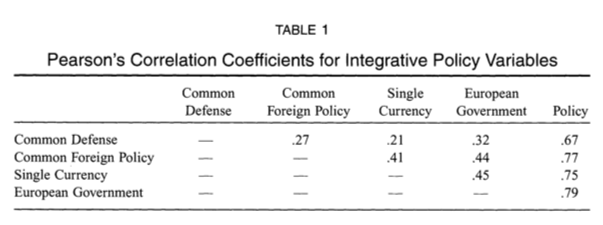

In [14]:
# Original Tale for Comparison.
Image(filename='papers/Table1.png')


#### How do the survey responses to Unify and Membership relate to Policy?

In [16]:
membership_and_unify

membership                unify  mem_numerical  unify_numerical
0      NEITHER NOR   FOR TO SOME EXTENT            2.0              3.0
1       GOOD THING   FOR TO SOME EXTENT            3.0              3.0
2      NEITHER NOR   FOR TO SOME EXTENT            2.0              3.0
3              NaN   FOR TO SOME EXTENT            NaN              3.0
4              NaN   FOR TO SOME EXTENT            NaN              3.0
5       GOOD THING        FOR VERY MUCH            3.0              4.0
6       GOOD THING   FOR TO SOME EXTENT            3.0              3.0
7       GOOD THING        FOR VERY MUCH            3.0              4.0
8       GOOD THING        FOR VERY MUCH            3.0              4.0
9       GOOD THING        FOR VERY MUCH            3.0              4.0
10       BAD THING   FOR TO SOME EXTENT            1.0              3.0
11      GOOD THING   FOR TO SOME EXTENT            3.0              3.0
12      GOOD THING        FOR VERY MUCH            3.0              4.0
13       BAD THING    AGAINST VERY MUCH            1.0              1.0
14      GOOD THING        FOR VERY MUCH            3.0              4.0
15     NEITHER NOR   FOR TO SOME EXTENT            2.0              3.0
16      GOOD THING   FOR TO SOME EXTENT            3.0              3.0
17      GOOD THING        FOR VERY MUCH            3.0              4.0
18      GOOD THING        FOR VERY MUCH            3.0              4.0
19      GOOD THING        FOR VERY MUCH            3.0              4.0
20     NEITHER NOR  AGAINST TO SOME EXT            2.0              2.0
21       BAD THING  AGAINST TO SOME EXT            1.0              2.0
22       BAD THING  AGAINST TO SOME EXT            1.0              2.0
23     NEITHER NOR  AGAINST TO SOME EXT            2.0              2.0
24       BAD THING  AGAINST TO SOME EXT            1.0              2.0
25     NEITHER NOR        FOR VERY MUCH            2.0              4.0
26      GOOD THING        FOR VERY MUCH            3.0              4.0
27             NaN   FOR TO SOME EXTENT            NaN              3.0
28     NEITHER NOR        FOR VERY MUCH            2.0              4.0
29      GOOD THING        FOR VERY MUCH            3.0              4.0
...            ...                  ...            ...              ...
11764          NaN   FOR TO SOME EXTENT            NaN              3.0
11765   GOOD THING        FOR VERY MUCH            3.0              4.0
11766   GOOD THING        FOR VERY MUCH            3.0              4.0
11767  NEITHER NOR                  NaN            2.0              2.5
11768   GOOD THING        FOR VERY MUCH            3.0              4.0
11769   GOOD THING        FOR VERY MUCH            3.0              4.0
11770          NaN                  NaN            NaN              2.5
11771          NaN                  NaN            NaN              2.5
11772  NEITHER NOR                  NaN            2.0              2.5
11773          NaN                  NaN            NaN              2.5
11774   GOOD THING        FOR VERY MUCH            3.0              4.0
11775   GOOD THING        FOR VERY MUCH            3.0              4.0
11776          NaN                  NaN            NaN              2.5
11777   GOOD THING        FOR VERY MUCH            3.0              4.0
11778          NaN                  NaN            NaN              2.5
11779   GOOD THING        FOR VERY MUCH            3.0              4.0
11780   GOOD THING        FOR VERY MUCH            3.0              4.0
11781   GOOD THING        FOR VERY MUCH            3.0              4.0
11782   GOOD THING        FOR VERY MUCH            3.0              4.0
11783          NaN                  NaN            NaN              2.5
11784          NaN                  NaN            NaN              2.5
11785   GOOD THING                  NaN            3.0              2.5
11786   GOOD THING        FOR VERY MUCH            3.0              4.0
11787          NaN        FOR VERY MUCH         